# Decision Tree Classifier
## ID3 for Breast Cancer Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset - Breast Cancer

In [2]:
data_df = pd.read_csv('data/breast_cancer.csv')
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Seperating Independent and Dependent Variables

In [3]:
x = data_df.iloc[:,2:-1]
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y = data_df.iloc[:, 1:2]
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


## Spliting the Data for Test Train

In [5]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=100)
x_train.shape

(455, 30)

## Training the Decision Tree Classifier

In [6]:
from sklearn import tree

myClassifier = tree.DecisionTreeClassifier(criterion='entropy')
myClassifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction of the Classifier

In [7]:
y_hat = myClassifier.predict(x_test)
y_hat[:5]

array(['M', 'B', 'M', 'B', 'B'], dtype=object)

## Evaluation of the Model

In [8]:
print("Train Accuracy: ", myClassifier.score(x_train, y_train))
print("Test Accuracy: ", myClassifier.score(x_test, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9649122807017544


In [9]:
from sklearn import metrics

print("Train Accuracy: ", metrics.accuracy_score(y_train, myClassifier.predict(x_train)))
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train Accuracy:  1.0
Test Accuracy:  0.9649122807017544


In [10]:
print("Train Confussion Matrix: \n", metrics.confusion_matrix(y_train, myClassifier.predict(x_train)))
print("\nTest Confussion Matrix: \n", metrics.confusion_matrix(y_test, y_hat))

Train Confussion Matrix: 
 [[292   0]
 [  0 163]]

Test Confussion Matrix: 
 [[63  2]
 [ 2 47]]


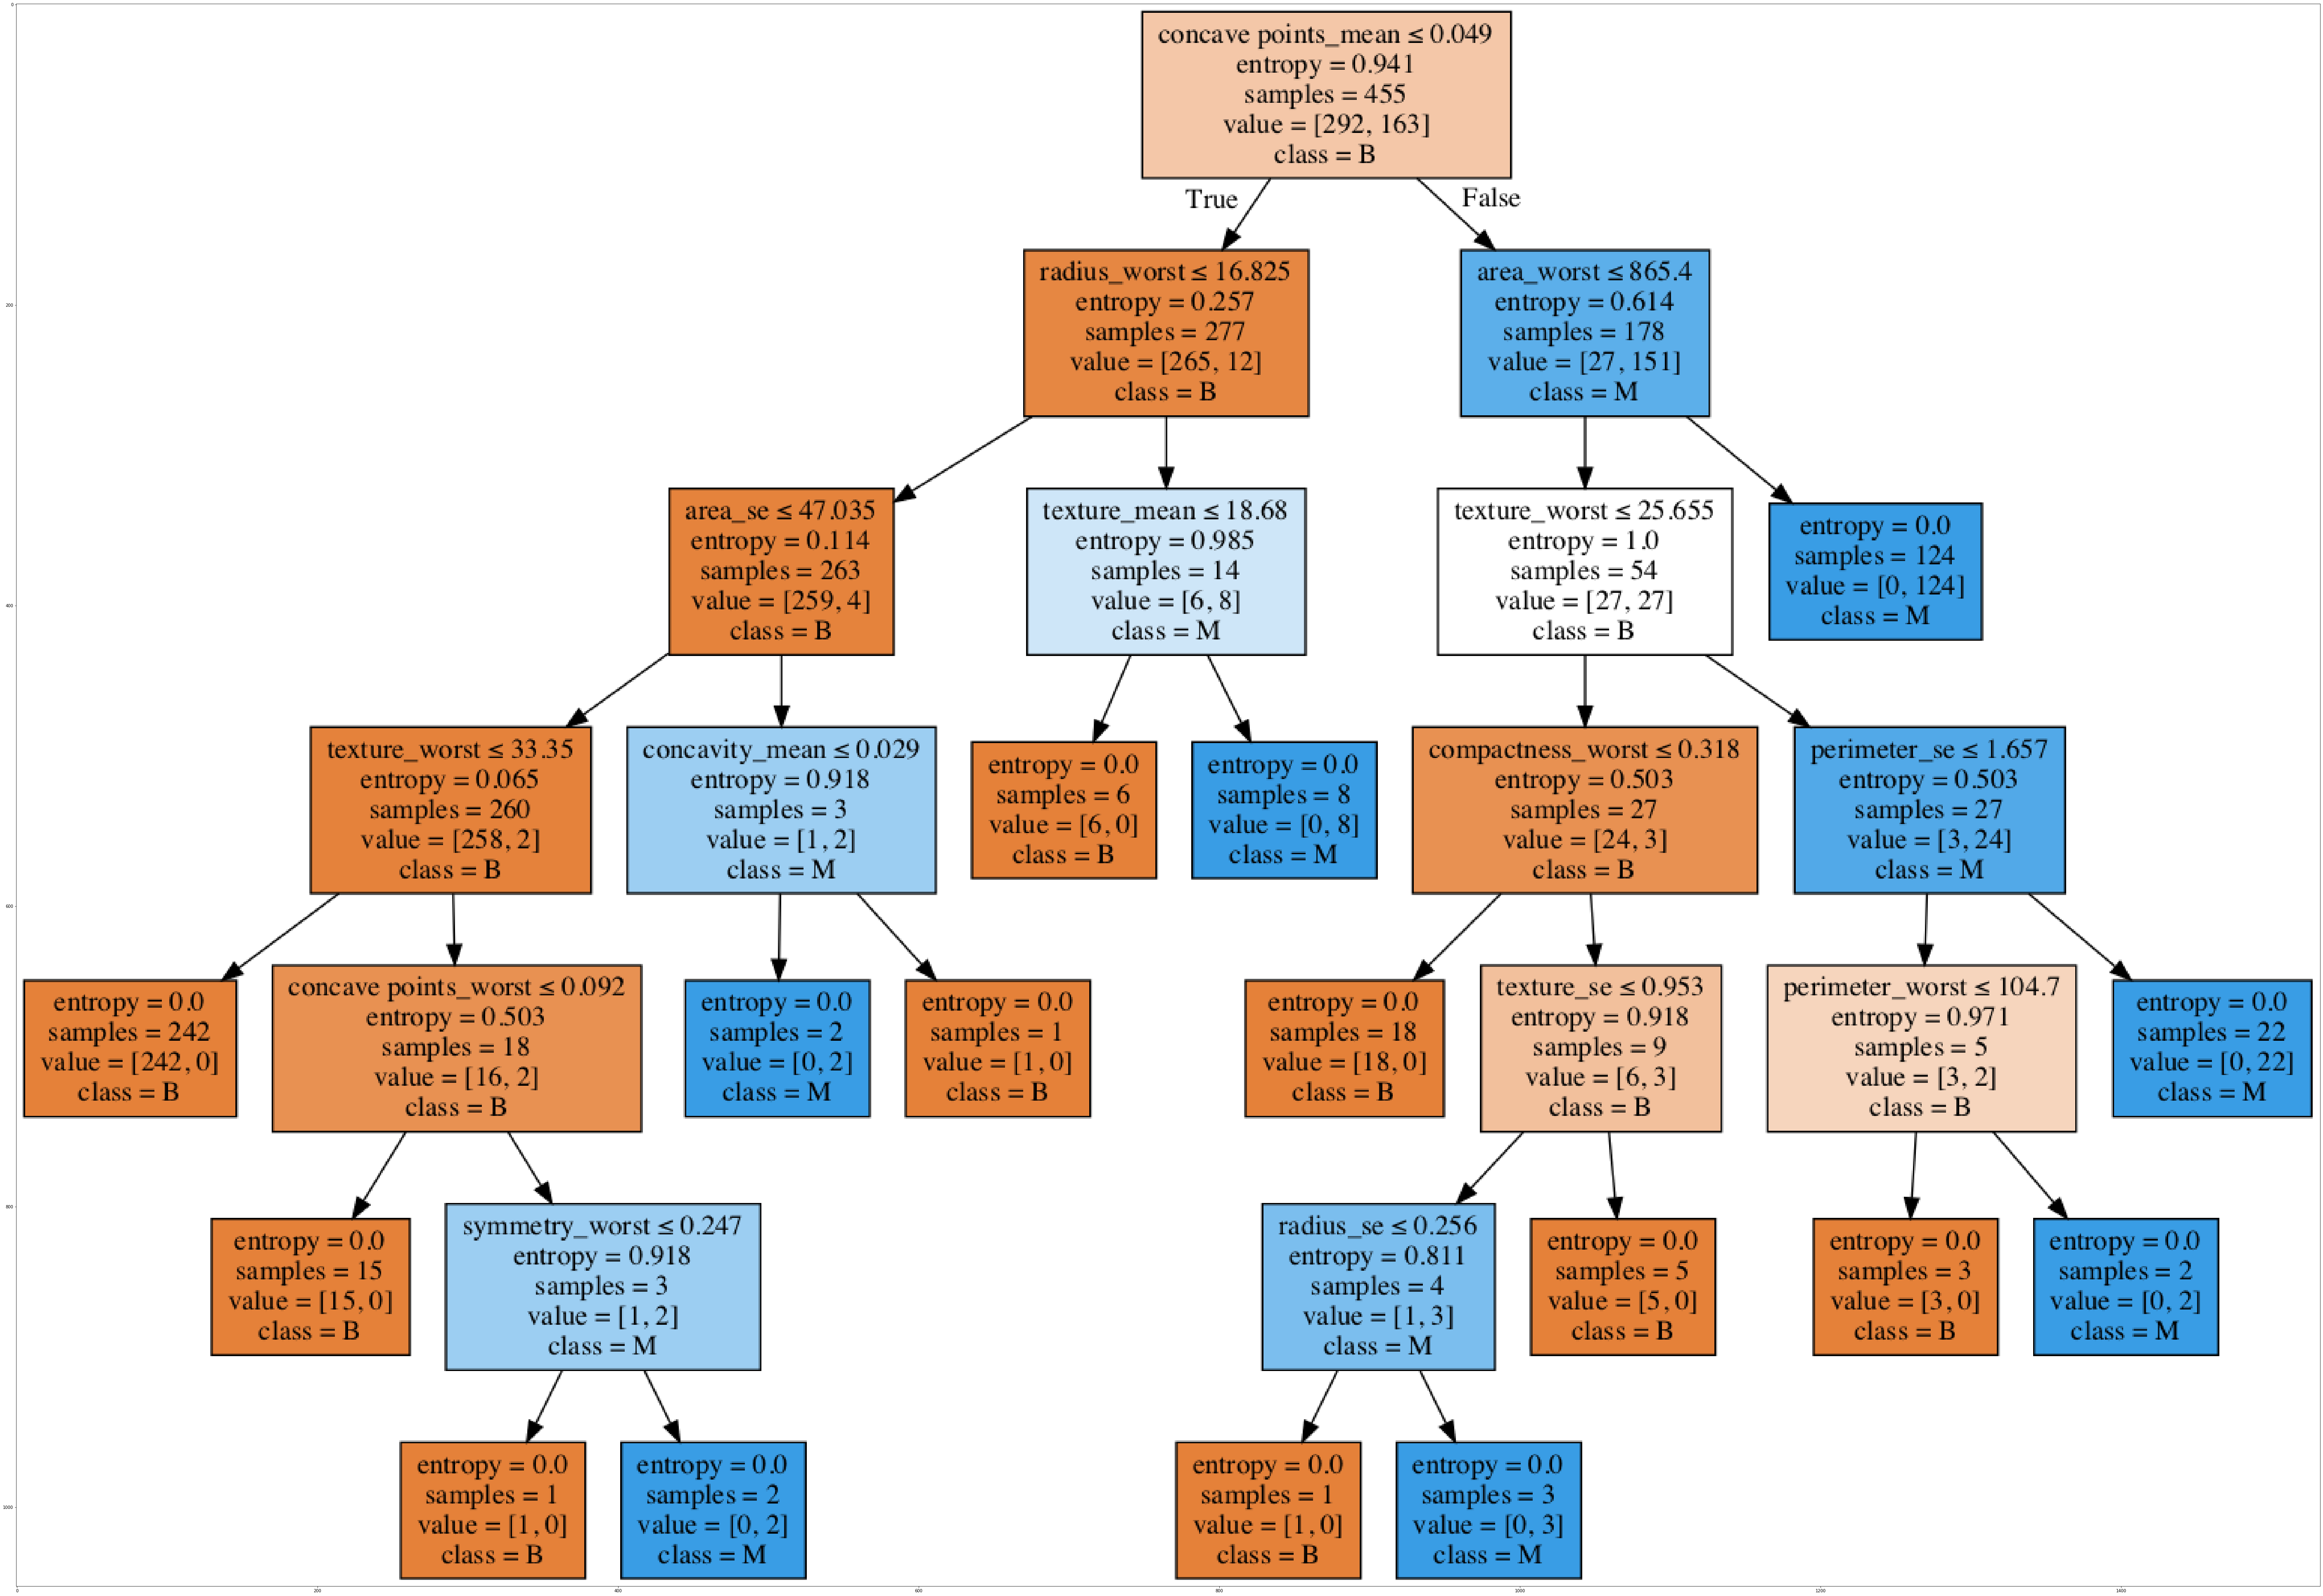

In [12]:
from sklearn.externals.six import StringIO
import pydotplus

attributes = data_df.columns[2:-1]
dot_data = StringIO()
filename = "decisionTree.png"
out = tree.export_graphviz(myClassifier,feature_names=attributes, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline 

img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')